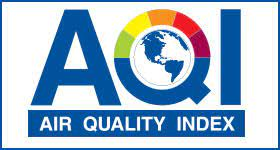

### *The air quality index (AQI) is a number used to report the quality of the air on any given day: it basically tells you how clean the air is. It measures particles and chemicals in the air that affect people's health (and ignores those that do not). The health effects from extreme pollution in places like China can be severe. These effects can range from slight irritations, to reduced endurance, to respiratory problems.*

  ### *The AQI was created to help communicate the severity of air quality levels for multiple pollutants to the public, the risks they carry and recommended defensive measures through a single composite index, a colour-code and broad categories of air quality levels (good, moderate, poor, etc.).*

In [1]:
## importing packages
import numpy as np
import pandas as pd

# **Preparing the Data**
## The dataset used is hourly air quality data (2015 - 2020) from various measuring stations across India: 
[https://www.kaggle.com/rohanrao/air-quality-data-in-india]


 We'll use the metro city (Delhi) and analyze the data of two stations ,here i am using **MUNDKA** and **RK-PURAM** as the air quality of these two places are reported to be worst among all places in Delhi and compare it with the actual AQI values present in the data at station, city, hour and day level to confirm the calculations are correct.

In [2]:
## defining constants
PATH_STATION_HOUR = "C:\\Users\Dell\Downloads\data aqi\station_hour.csv"
PATH_STATION_DAY = "C:\\Users\Dell\Downloads\data aqi\station_day.csv"
PATH_CITY_HOUR = "C:\\Users\Dell\Downloads\data aqi\city_hour.csv"
PATH_CITY_DAY = "C:\\Users\Dell\Downloads\data aqi\city_day.csv"
PATH_STATIONS = "C:\\Users\Dell\Downloads\data aqi\/stations.csv"

STATIONS = ["DL031", "DL020"]

In [3]:
## importing data and subsetting the station
df = pd.read_csv(PATH_STATION_HOUR, parse_dates = ["Datetime"])
#  we need to convert it into date-time format
# parse_dates =["date"], converts the "date" column to date-time format
stations = pd.read_csv(PATH_STATIONS)

df = df.merge(stations, on = "StationId")

#isin() method helps in selecting rows with having a particular(or Multiple) value in a particular column
df = df[df.StationId.isin(STATIONS)]
df.sort_values(["StationId", "Datetime"], inplace = True)
#If True, sort values in ascending order, otherwise descending
df["Date"] = df.Datetime.dt.date.astype(str)
df.Datetime = df.Datetime.astype(str)

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status,Date
716101,DL020,2018-07-03 19:00:00,31.0,166.0,0.10,20.00,10.70,36.90,0.80,29.70,...,1.10,27.90,NaN,NaN,NaN,"Mundka, Delhi - DPCC",Delhi,Delhi,Active,2018-07-03
716102,DL020,2018-07-03 20:00:00,31.0,162.0,0.25,22.70,12.12,38.38,0.87,30.05,...,2.75,34.12,NaN,NaN,NaN,"Mundka, Delhi - DPCC",Delhi,Delhi,Active,2018-07-03
716103,DL020,2018-07-03 21:00:00,33.5,164.5,0.83,31.28,17.37,37.30,1.18,26.97,...,3.05,56.58,NaN,NaN,NaN,"Mundka, Delhi - DPCC",Delhi,Delhi,Active,2018-07-03
716104,DL020,2018-07-03 22:00:00,43.0,200.0,3.00,55.48,31.95,40.58,1.47,31.40,...,5.47,78.32,NaN,NaN,NaN,"Mundka, Delhi - DPCC",Delhi,Delhi,Active,2018-07-03
716105,DL020,2018-07-03 23:00:00,53.0,229.5,5.90,55.63,34.40,44.62,1.45,28.75,...,4.80,66.52,NaN,NaN,NaN,"Mundka, Delhi - DPCC",Delhi,Delhi,Active,2018-07-03


## Formula
![](https://i.imgur.com/vQR5Zy0.png)

* The AQI calculation uses 7 measures: **PM2.5, PM10, SO2, NOx, NH3, CO and O3**.
* For **PM2.5, PM10, SO2, NOx and NH3** the average value in last 24-hrs is used with the condition of having at least 16 values.
* For **CO and O3** the maximum value in last 8-hrs is used.
* Each measure is converted into a Sub-Index based on pre-defined groups.
* Sometimes measures are not available due to lack of measuring or lack of required data points.
* Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

In [6]:
df["PM10_24hr_avg"] = df.groupby("StationId")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df["PM2.5_24hr_avg"] = df.groupby("StationId")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df.groupby("StationId")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NOx_24hr_avg"] = df.groupby("StationId")["NOx"].rolling(window = 24, min_periods = 16).mean().values
df["NH3_24hr_avg"] = df.groupby("StationId")["NH3"].rolling(window = 24, min_periods = 16).mean().values
df["CO_8hr_max"] = df.groupby("StationId")["CO"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df.groupby("StationId")["O3"].rolling(window = 8, min_periods = 1).max().values

In [16]:
df[["PM10_24hr_avg"]].head(20)

,PM10_24hr_avg
716101,NaN
716102,NaN
716103,NaN
716104,NaN
716105,NaN
716106,NaN
716107,NaN
716108,NaN
716109,NaN
716110,NaN


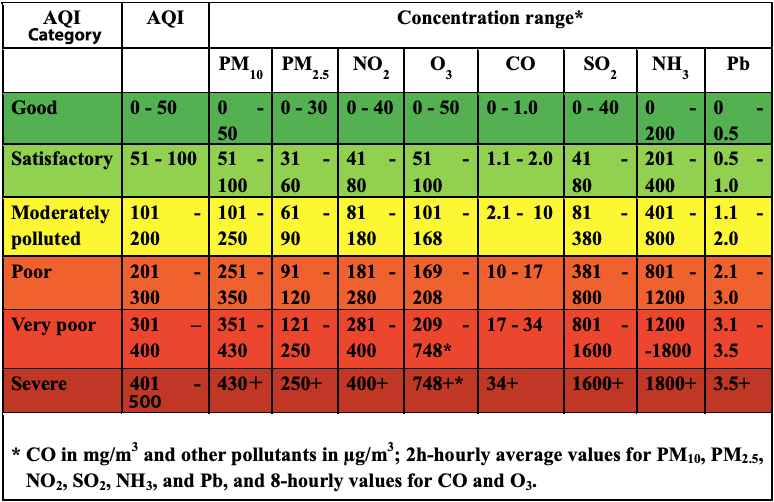

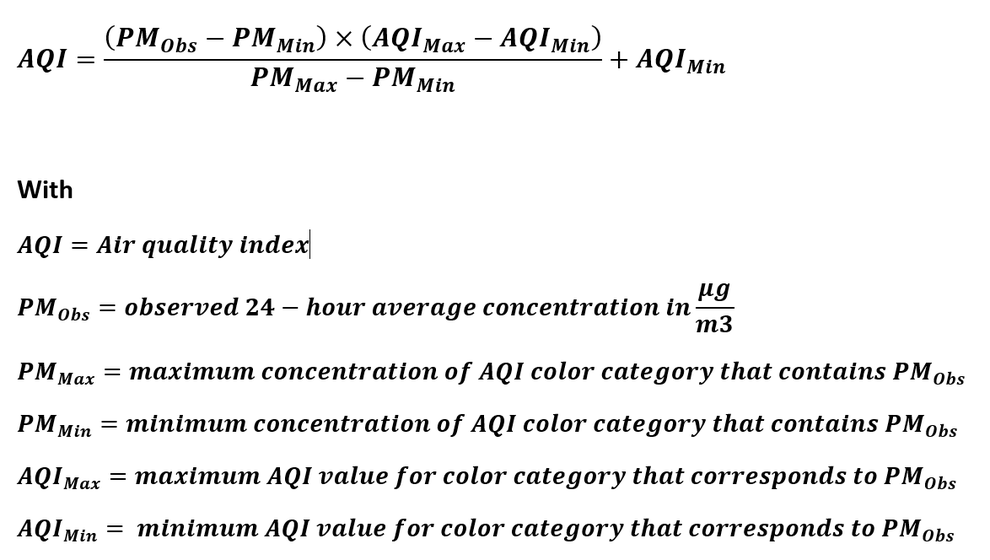

## PM2.5 (Particulate Matter 2.5-micrometer)
PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [7]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0
#new column
df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

## PM10 (Particulate Matter 10-micrometer)
PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [8]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

## SO2 (Sulphur Dioxide)
SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [9]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

## NOx (Any Nitric x-oxide)
NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:

In [10]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

## NH3 (Ammonia)
NH3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [11]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

## CO (Carbon Monoxide)
CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:

In [12]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

## O3 (Ozone or Trioxygen)
O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [13]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

## AQI
The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

There is no theoretical upper value of AQI but its rare to find values over 1000.

The pre-defined buckets of AQI are as follows:
![](https://i.imgur.com/XmnE0rT.png)

In [14]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

#use NumPy max with axis = 1, we’re telling NumPy to compute the maxima horizontally, in the axis 1 direction.
df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))


#at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
#negative of is na
df[~df.AQI_calculated.isna()].head(13)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
716116,DL020,2018-07-04 10:00:00,23.0,58.0,4.10,29.03,18.80,66.80,0.98,10.52,...,69.010417,135.437500,25.718750,25.533594,13.808594,49.0,10.13,7,135.0,Moderate
716117,DL020,2018-07-04 11:00:00,31.0,84.5,3.18,28.95,18.00,65.95,0.97,16.58,...,67.990196,132.745098,25.425000,25.355147,13.966176,49.0,20.95,7,133.0,Moderate
716118,DL020,2018-07-04 12:00:00,40.0,108.0,1.77,26.17,15.38,60.37,0.95,24.47,...,67.916667,131.222222,25.711806,25.014583,14.028750,49.0,33.60,7,131.0,Moderate
716119,DL020,2018-07-04 13:00:00,42.5,118.5,1.02,24.30,13.78,62.38,0.87,22.18,...,68.070175,130.228070,25.817763,24.604605,14.111184,49.0,49.85,7,130.0,Moderate
716120,DL020,2018-07-04 14:00:00,39.0,138.5,0.65,17.92,10.05,54.70,0.70,24.00,...,67.916667,130.000000,26.026875,24.002500,14.089375,49.0,54.23,7,130.0,Moderate
716121,DL020,2018-07-04 15:00:00,31.5,153.5,0.45,15.40,8.58,46.85,0.70,24.22,...,67.182540,130.269841,26.229167,23.370238,13.976190,49.0,63.78,7,130.0,Moderate
716122,DL020,2018-07-04 16:00:00,31.5,173.0,0.60,14.05,7.95,44.25,0.72,24.62,...,66.515152,131.106061,26.435795,22.759659,13.843750,49.0,69.12,7,131.0,Moderate
716123,DL020,2018-07-04 17:00:00,31.5,183.0,0.65,14.17,8.05,38.50,0.75,23.20,...,65.905797,132.159420,26.547283,22.207609,13.660326,49.0,69.12,7,132.0,Moderate
716124,DL020,2018-07-04 18:00:00,28.5,186.5,0.60,17.15,9.60,38.70,0.77,18.65,...,65.138889,133.222222,26.412500,21.782292,13.494271,48.5,69.12,7,133.0,Moderate
716125,DL020,2018-07-04 19:00:00,36.5,207.0,0.25,20.70,11.20,37.57,0.80,19.30,...,65.520833,134.361111,25.870833,21.808333,13.501250,47.5,69.12,7,134.0,Moderate


In [17]:
df[~df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

Moderate        18326
Very Poor       14178
Poor             9654
Severe           7616
Satisfactory     6167
Good              176
Name: AQI_bucket_calculated, dtype: int64

## Day level
To get AQI at day level, the AQI values are averaged over the hours of the day.

In [18]:
df_station_hour = df
df_station_day = pd.read_csv(PATH_STATION_DAY)

df_station_day = df_station_day.merge(df.groupby(["StationId", "Date"])["AQI_calculated"].mean().reset_index(), on = ["StationId", "Date"])
df_station_day.AQI_calculated = round(df_station_day.AQI_calculated)

## City level
To get AQI at city level, the AQI values are averaged over stations of the city.

In [19]:
df_city_hour = pd.read_csv(PATH_CITY_HOUR)
df_city_day = pd.read_csv(PATH_CITY_DAY)

df_city_hour["Date"] = pd.to_datetime(df_city_hour.Datetime).dt.date.astype(str)

df_city_hour = df_city_hour.merge(df.groupby(["City", "Datetime"])["AQI_calculated"].mean().reset_index(), on = ["City", "Datetime"])
df_city_hour.AQI_calculated = round(df_city_hour.AQI_calculated)

df_city_day = df_city_day.merge(df_city_hour.groupby(["City", "Date"])["AQI_calculated"].mean().reset_index(), on = ["City", "Date"])
df_city_day.AQI_calculated = round(df_city_day.AQI_calculated)

## Verification
Since this exact formula is used for AQI calculated, lets quickly compare it with the actual AQI values present in the raw data at each of the four levels.

In [26]:
df_check_station_hour = df_station_hour[["AQI", "AQI_calculated"]].dropna()
df_sthour = df_station_hour[df_station_hour["AQI"]==df_station_hour["AQI_calculated"]]
df_shour1 = df_sthour[["AQI", "AQI_calculated","City","StationName"]]


df_check_station_day = df_station_day[["AQI", "AQI_calculated"]].dropna()
df_stday = df_station_day[df_station_day["AQI"]==df_station_day["AQI_calculated"]]
df_sday1 = df_stday[["AQI", "AQI_calculated"]]


df_check_city_hour = df_city_hour[["AQI", "AQI_calculated"]].dropna()
df_check_city_hour1 = df_city_hour[["AQI", "AQI_calculated","City"]].dropna()


df_check_city_day = df_city_day[["AQI", "AQI_calculated","City"]].dropna()

print("Station + Hour")
print("Rows: ", df_check_station_hour.shape[0])
print("Matched AQI: ", (df_check_station_hour.AQI == df_check_station_hour.AQI_calculated).sum())
print("% Match: ", (df_check_station_hour.AQI == df_check_station_hour.AQI_calculated).sum() * 100 / df_check_station_hour.shape[0])
print("\n")
print("Station + Day")
print("Rows: ", df_check_station_day.shape[0])
print("Matched AQI: ", (df_check_station_day.AQI == df_check_station_day.AQI_calculated).sum())
print("% Match: ", (df_check_station_day.AQI == df_check_station_day.AQI_calculated).sum() * 100 / df_check_station_day.shape[0])
print("\n")
print("City + Hour")
print("Rows: ", df_check_city_hour.shape[0])
print("Matched AQI: ", (df_check_city_hour.AQI == df_check_city_hour.AQI_calculated).sum())
print("% Match: ", (df_check_city_hour.AQI == df_check_city_hour.AQI_calculated).sum() * 100 / df_check_city_hour.shape[0])
print("\n")
print("City + Day")
print("Rows: ", df_check_city_day.shape[0])
print("Matched AQI: ", (df_check_city_day.AQI == df_check_city_day.AQI_calculated).sum())
print("% Match: ", (df_check_city_day.AQI == df_check_city_day.AQI_calculated).sum() * 100 / df_check_city_day.shape[0])

Station + Hour
Rows:  56117
Matched AQI:  56048
% Match:  99.87704260740952


Station + Day
Rows:  2409
Matched AQI:  2405
% Match:  99.83395599833956


City + Hour
Rows:  39642
Matched AQI:  554
% Match:  1.3975076938600475


City + Day
Rows:  1698
Matched AQI:  23
% Match:  1.3545347467608952


In [22]:
df_sday1.head()

,AQI,AQI_calculated
1,132.0,132.0
2,131.0,131.0
3,173.0,173.0
4,198.0,198.0
5,312.0,312.0


In [23]:
df_shour1.head()

,AQI,AQI_calculated,City,StationName
716116,135.0,135.0,Delhi,"Mundka, Delhi - DPCC"
716117,133.0,133.0,Delhi,"Mundka, Delhi - DPCC"
716118,131.0,131.0,Delhi,"Mundka, Delhi - DPCC"
716119,130.0,130.0,Delhi,"Mundka, Delhi - DPCC"
716120,130.0,130.0,Delhi,"Mundka, Delhi - DPCC"


In [25]:
df_check_city_hour1.head()

,AQI,AQI_calculated,City
15,213.0,399.0,Delhi
16,228.0,359.0,Delhi
17,230.0,359.0,Delhi
18,232.0,359.0,Delhi
19,233.0,359.0,Delhi


In [27]:
df_check_city_day.head()

,AQI,AQI_calculated,City
1,234.0,276.0,Delhi
2,343.0,193.0,Delhi
6,290.0,231.0,Delhi
7,375.0,364.0,Delhi
8,293.0,224.0,Delhi
